In [334]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Task A (调包)

##  Discrete Data

In [335]:
sampleData = pd.read_excel('../Data/附件1-Sampledata-discrete.xls').set_index('Id')
sampleData.head()

,age,income,student,credit_rating,buys_computer
Id,,,,,
1,<=30,high,no,fair,no
2,<=30,high,no,excellent,no
3,31…40,high,no,fair,yes
4,>40,medium,no,fair,yes
5,>40,low,yes,fair,yes


In [336]:
data = sampleData.iloc[:-1, :]
new_data = sampleData.iloc[-1, :-1]
print(data.shape, new_data.shape)

(21, 5) (4,)


In [337]:
# 数值化处理
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_encoded = data.apply(le.fit_transform)
new_data_encoded = le.fit_transform(new_data)
new_data_encoded = pd.DataFrame(new_data_encoded.reshape(1, -1), columns=data.columns[:-1])
new_data_encoded

,age,income,student,credit_rating
0,0,2,3,1


In [338]:
new_data_encoded

,age,income,student,credit_rating
0,0,2,3,1


In [339]:
# 采用holdout方法将原始数据集分成训练集和测试集
from sklearn.model_selection import train_test_split

In [340]:
def holdout(data, test_size=1/3):
    train, test = train_test_split(data, test_size=test_size)
    return train, test


In [341]:
train, test = holdout(data_encoded)
print(train.shape, test.shape)

(14, 5) (7, 5)


In [342]:
print("训练集：", train.head(), sep='\n')
print("测试集：", test.head(), sep='\n')

训练集：
    age  income  student  credit_rating  buys_computer
Id                                                    
13    0       0        1              1              1
16    1       1        1              0              1
17    0       2        1              1              1
4     2       2        0              1              1
1     1       0        0              1              0
测试集：
    age  income  student  credit_rating  buys_computer
Id                                                    
18    0       0        0              0              1
9     1       1        1              1              1
14    2       2        0              0              0
6     2       1        1              0              0
5     2       1        1              1              1


### Discrete data -- Decision Tree Model

In [343]:
# 针对训练集采用gini index生成决策模型。
from sklearn.tree import DecisionTreeClassifier

In [344]:
model1 = DecisionTreeClassifier(criterion='gini')
model1.fit(train.iloc[:, :-1], train.iloc[:, -1])

DecisionTreeClassifier()

In [345]:
# 针对测试集进行预测
pred1 = model1.predict(test.iloc[:, :-1])
pred1 = pd.Series(pred1, index=test.index, name='pred')
test1 = pd.concat([test, pred1], axis=1)
test1

,age,income,student,credit_rating,buys_computer,pred
Id,,,,,,
18,0,0,0,0,1,1
9,1,1,1,1,1,1
14,2,2,0,0,0,1
6,2,1,1,0,0,1
5,2,1,1,1,1,1
7,0,1,1,0,1,1
21,2,0,0,1,0,1


In [346]:
# 计算准确率
from sklearn.metrics import accuracy_score
acc = accuracy_score(test1.iloc[:, -2], test1.iloc[:, -1])
print("Task A: 离散变量决策树模型的准确率为：", acc)

Task A: 离散变量决策树模型的准确率为： 0.5714285714285714


In [347]:
pred_new1 = model1.predict(new_data_encoded)
print("Task A: 离散变量决策树模型预测该数据的类别为：", pred_new1[0])

Task A: 离散变量决策树模型预测该数据的类别为： 1


### Discrete data -- Bayes Model

In [348]:
# 贝叶斯分类器
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()
model2.fit(train.iloc[:, :-1], train.iloc[:, -1])

GaussianNB()

In [349]:
pred2 = model2.predict(test.iloc[:, :-1])
pred2 = pd.Series(pred2, index=test.index, name='pred')
test2 = pd.concat([test, pred2], axis=1)
test2.head()

,age,income,student,credit_rating,buys_computer,pred
Id,,,,,,
18,0,0,0,0,1,1
9,1,1,1,1,1,1
14,2,2,0,0,0,1
6,2,1,1,0,0,1
5,2,1,1,1,1,1


In [350]:
# 计算准确率
acc2 = accuracy_score(test2.iloc[:, -2], test2.iloc[:, -1])
print("Task A：离散型数据，该贝叶斯分类器模型的准确率为：", acc2)

Task A：离散型数据，该贝叶斯分类器模型的准确率为： 0.5714285714285714


In [351]:
pred_new2 = model2.predict(new_data_encoded)
print("Task A：离散型数据，贝叶斯模型预测该数据的类别为：", pred_new2[0])

Task A：离散型数据，贝叶斯模型预测该数据的类别为： 1


### Discrete data -- ANN Model

In [391]:
# ANN
from sklearn.neural_network import MLPClassifier
model3 = MLPClassifier(hidden_layer_sizes=(4, 8), max_iter=2200)
model3.fit(train.iloc[:, :-1], train.iloc[:, -1])

MLPClassifier(hidden_layer_sizes=(4, 8), max_iter=2200)

In [392]:
pred3 = model3.predict(test.iloc[:, :-1])
pred3 = pd.Series(pred3, index=test.index, name='pred')
test3 = pd.concat([test, pred3], axis=1)
test3.head()

,age,income,student,credit_rating,buys_computer,pred
Id,,,,,,
18,0,0,0,0,1,1
9,1,1,1,1,1,1
14,2,2,0,0,0,1
6,2,1,1,0,0,1
5,2,1,1,1,1,1


In [393]:
# 计算准确率
acc3 = accuracy_score(test3.iloc[:, -2], test3.iloc[:, -1])
print("Task C：离散型数据，ANN模型的准确率为：", acc3)

Task C：离散型数据，ANN模型的准确率为： 0.5714285714285714


In [394]:
pred_new3 = model3.predict(new_data_encoded)
print("Task C：离散型数据，ANN模型预测该数据的类别为：", pred_new3[0])

Task C：离散型数据，ANN模型预测该数据的类别为： 1


## Continuous data

In [356]:
cdataAll = pd.read_excel('../Data/附件2-Sampledata-continuous.xls', sheet_name= 'data').set_index('SERIAL_NUMBER')
cdataAll.head()

,HS_AGE,VAS_AR_FLAG,AVG_USAGE_DAYS,AVG_BILL_AMT,AVG_MINS,AVG_CALL,AVG_VAS_GAMES,CUSTOMER_TYPE
SERIAL_NUMBER,,,,,,,,
1,0.12,1,0.99,0.34,0.31,0.25,0.00,2G
2,1.00,0,0.29,0.00,0.03,0.01,0.00,2G
3,0.35,0,1.00,0.36,0.47,0.47,0.03,3G
4,0.00,0,0.98,0.18,0.19,0.18,0.01,3G
5,0.55,0,0.84,0.10,0.05,0.06,0.00,2G


In [357]:
cdata = cdataAll.iloc[:-1, :]
new_cdata = cdataAll.iloc[-1, :-1]
print(cdata.shape, new_cdata.shape)

(27, 8) (7,)


In [358]:
# 对客户等级CUSTOMER_TYPE进行数值化处理
le = LabelEncoder()
cdata_encoded = cdata.copy()
cdata_encoded['CUSTOMER_TYPE'] = le.fit_transform(cdata_encoded['CUSTOMER_TYPE'])
cdata_encoded.head()


,HS_AGE,VAS_AR_FLAG,AVG_USAGE_DAYS,AVG_BILL_AMT,AVG_MINS,AVG_CALL,AVG_VAS_GAMES,CUSTOMER_TYPE
SERIAL_NUMBER,,,,,,,,
1,0.12,1,0.99,0.34,0.31,0.25,0.00,0
2,1.00,0,0.29,0.00,0.03,0.01,0.00,0
3,0.35,0,1.00,0.36,0.47,0.47,0.03,1
4,0.00,0,0.98,0.18,0.19,0.18,0.01,1
5,0.55,0,0.84,0.10,0.05,0.06,0.00,0


In [359]:
ctrain, ctest = holdout(cdata_encoded)
print(ctrain.shape, ctest.shape)

(18, 8) (9, 8)


In [360]:
print("训练集：", ctrain.head())
print("测试集：", ctest.head())

训练集：                HS_AGE  VAS_AR_FLAG  AVG_USAGE_DAYS  AVG_BILL_AMT  AVG_MINS  \
SERIAL_NUMBER                                                                
26               0.02            0            0.46          0.04      0.08   
8                0.07            0            0.53          0.11      0.02   
2                1.00            0            0.29          0.00      0.03   
25               0.22            1            0.66          0.94      0.07   
6                0.00            0            1.00          0.14      0.08   

               AVG_CALL  AVG_VAS_GAMES  CUSTOMER_TYPE  
SERIAL_NUMBER                                          
26                 0.02           0.00              0  
8                  0.01           0.25              0  
2                  0.01           0.00              0  
25                 0.04           0.02              0  
6                  0.09           0.00              0  
测试集：                HS_AGE  VAS_AR_FLAG  AVG_USAGE_DAYS 

### Continuous data -- Decision Model

In [361]:
model4 = DecisionTreeClassifier(criterion='gini')
model4.fit(ctrain.iloc[:, :-1], ctrain.iloc[:, -1])

DecisionTreeClassifier()

In [362]:
pred4 = model4.predict(ctest.iloc[:, :-1])
pred4 = pd.Series(pred4, index=ctest.index, name='pred')
ctest1 = pd.concat([ctest, pred4], axis=1)
ctest1

,HS_AGE,VAS_AR_FLAG,AVG_USAGE_DAYS,AVG_BILL_AMT,AVG_MINS,AVG_CALL,AVG_VAS_GAMES,CUSTOMER_TYPE,pred
SERIAL_NUMBER,,,,,,,,,
3,0.35,0,1.00,0.36,0.47,0.47,0.03,1,0
19,0.17,0,0.99,0.09,0.13,0.10,0.04,1,1
20,0.00,0,0.99,0.19,0.16,0.14,0.00,1,1
13,0.00,0,0.96,0.17,0.44,0.10,0.00,1,1
7,0.35,1,0.98,0.21,0.12,0.11,0.00,1,1
14,0.03,0,0.76,0.05,0.09,0.04,0.08,0,1
4,0.00,0,0.98,0.18,0.19,0.18,0.01,1,1
1,0.12,1,0.99,0.34,0.31,0.25,0.00,0,0
21,0.02,1,0.91,0.16,0.11,0.05,0.02,1,0


In [363]:
acc4 = accuracy_score(ctest1.iloc[:, -2], ctest1.iloc[:, -1])
print("Task A:连续型数据，决策树模型的准确率为：", acc4)

Task A:连续型数据，决策树模型的准确率为： 0.6666666666666666


In [364]:
pred_new4 = model4.predict(new_cdata.values.reshape(1, -1))
print("Task A:连续型数据，决策树模型预测该数据的类别为：", pred_new4[0])

Task A:连续型数据，决策树模型预测该数据的类别为： 0


### Continuous Data -- Bayes Model

In [365]:
model5 = GaussianNB()
model5.fit(ctrain.iloc[:, :-1], ctrain.iloc[:, -1])

GaussianNB()

In [366]:
pred5 = model5.predict(ctest.iloc[:, :-1])
pred5 = pd.Series(pred5, index=ctest.index, name='pred')
ctest2 = pd.concat([ctest, pred5], axis=1)
ctest2

,HS_AGE,VAS_AR_FLAG,AVG_USAGE_DAYS,AVG_BILL_AMT,AVG_MINS,AVG_CALL,AVG_VAS_GAMES,CUSTOMER_TYPE,pred
SERIAL_NUMBER,,,,,,,,,
3,0.35,0,1.00,0.36,0.47,0.47,0.03,1,0
19,0.17,0,0.99,0.09,0.13,0.10,0.04,1,1
20,0.00,0,0.99,0.19,0.16,0.14,0.00,1,1
13,0.00,0,0.96,0.17,0.44,0.10,0.00,1,0
7,0.35,1,0.98,0.21,0.12,0.11,0.00,1,1
14,0.03,0,0.76,0.05,0.09,0.04,0.08,0,1
4,0.00,0,0.98,0.18,0.19,0.18,0.01,1,1
1,0.12,1,0.99,0.34,0.31,0.25,0.00,0,0
21,0.02,1,0.91,0.16,0.11,0.05,0.02,1,1


In [367]:
acc5 = accuracy_score(ctest2.iloc[:, -2], ctest2.iloc[:, -1])
print("Task A: 连续型数据, 该贝叶斯分类器模型的准确率为：", acc5)

Task A: 连续型数据, 该贝叶斯分类器模型的准确率为： 0.6666666666666666


In [368]:
pred_new5 = model5.predict(new_cdata.values.reshape(1, -1))
print("Task A: 连续型数据, 贝叶斯模型预测该数据的类别为：", pred_new5[0])

Task A: 连续型数据, 贝叶斯模型预测该数据的类别为： 0


### Continuous Data -- ANN Model

In [415]:
model6 = MLPClassifier(hidden_layer_sizes=(8, 4), max_iter=1000)
model6.fit(ctrain.iloc[:, :-1], ctrain.iloc[:, -1])

MLPClassifier(hidden_layer_sizes=(8, 4), max_iter=1000)

In [416]:
pred6 = model6.predict(ctest.iloc[:, :-1])
pred6 = pd.Series(pred6, index=ctest.index, name='pred')
ctest3 = pd.concat([ctest, pred6], axis=1)
ctest3

,HS_AGE,VAS_AR_FLAG,AVG_USAGE_DAYS,AVG_BILL_AMT,AVG_MINS,AVG_CALL,AVG_VAS_GAMES,CUSTOMER_TYPE,pred
SERIAL_NUMBER,,,,,,,,,
3,0.35,0,1.00,0.36,0.47,0.47,0.03,1,0
19,0.17,0,0.99,0.09,0.13,0.10,0.04,1,1
20,0.00,0,0.99,0.19,0.16,0.14,0.00,1,1
13,0.00,0,0.96,0.17,0.44,0.10,0.00,1,0
7,0.35,1,0.98,0.21,0.12,0.11,0.00,1,0
14,0.03,0,0.76,0.05,0.09,0.04,0.08,0,1
4,0.00,0,0.98,0.18,0.19,0.18,0.01,1,1
1,0.12,1,0.99,0.34,0.31,0.25,0.00,0,0
21,0.02,1,0.91,0.16,0.11,0.05,0.02,1,1


In [417]:
acc6 = accuracy_score(ctest3.iloc[:, -2], ctest3.iloc[:, -1])
print("Task A：连续型数据，ANN模型的准确率为：", acc6)

Task A：连续型数据，ANN模型的准确率为： 0.5555555555555556


In [418]:
pred_new6 = model6.predict(new_cdata.values.reshape(1, -1))
print("Task A：连续型数据，ANN模型预测该数据的类别为：", pred_new6[0])

Task A：连续型数据，ANN模型预测该数据的类别为： 1


# Task B (Python编程)

## Decision Tree (Decision Tree - gini index)  详细代码见[DT_gini.py](DT_gini.py)

In [374]:
from DT_gini import *

### Discrete data

In [375]:
decision_Tree = create_tree(data = train)
print(decision_Tree)

{'age': {0: 1, 'Others': {'income': {1: 1, 'Others': {'student': {1: 1, 'Others': {'credit_rating': {0: 0, 'Others': 0}}}}}}}}


In [376]:
test_result1 = []
test_label1 = test.iloc[:,-1].tolist()
for i in range(len(test)):
    result = predict(decision_Tree, test.iloc[i,:-1])
    test_result1.append(result)


print("==== 测试集预测结果 ====")
print(test_result1)
print("==== 测试集Label ====")
print(test_label1)


# 计算准确率
acc = accuracy_score(test_label1, test_result1)
print("该决策树模型的准确率为：", acc)

==== 测试集预测结果 ====
[1, 1, 0, 1, 1, 1, 0]
==== 测试集Label ====
[1, 1, 0, 0, 1, 1, 0]
该决策树模型的准确率为： 0.8571428571428571


In [377]:
# 预测新数据
new_result1 = predict(decision_Tree, new_data_encoded.iloc[0, :])
print("新数据:\n",new_data_encoded)
print('--------')
print("决策树模型预测该数据的类别为：", new_result1)

新数据:
    age  income  student  credit_rating
0    0       2        3              1
--------
决策树模型预测该数据的类别为： 1


### Continuous data

In [378]:
ctrain

,HS_AGE,VAS_AR_FLAG,AVG_USAGE_DAYS,AVG_BILL_AMT,AVG_MINS,AVG_CALL,AVG_VAS_GAMES,CUSTOMER_TYPE
SERIAL_NUMBER,,,,,,,,
26,0.02,0,0.46,0.04,0.08,0.02,0.00,0
8,0.07,0,0.53,0.11,0.02,0.01,0.25,0
2,1.00,0,0.29,0.00,0.03,0.01,0.00,0
25,0.22,1,0.66,0.94,0.07,0.04,0.02,0
6,0.00,0,1.00,0.14,0.08,0.09,0.00,0
27,0.32,1,0.00,0.04,0.00,0.00,0.00,0
22,0.05,1,0.89,0.37,0.14,0.10,0.20,0
16,0.62,0,1.00,0.28,0.22,0.21,1.00,1
24,0.33,0,0.11,0.00,0.00,0.00,0.00,0


In [379]:
# 一个重要的问题是需要将连续型数据离散化，这里采用的是等宽离散化
# 等宽离散化的属性：HS_AGE，AVG_USAGE_DAYS，AVG_BILL_AMT，AVG_MINS，AVG_CALL，AVG_VAS_GAMES
def discretization(data, cols, k):
    data_copy = data.copy()
    for col in cols:
        data_copy[col] = pd.cut(data_copy[col], k, labels=range(k))
    return data_copy

cols = ['HS_AGE', 'AVG_USAGE_DAYS', 'AVG_BILL_AMT', 'AVG_MINS', 'AVG_CALL', 'AVG_VAS_GAMES']
k = 5
cdata_disc = discretization(ctrain, cols, k)
cdata_disc

,HS_AGE,VAS_AR_FLAG,AVG_USAGE_DAYS,AVG_BILL_AMT,AVG_MINS,AVG_CALL,AVG_VAS_GAMES,CUSTOMER_TYPE
SERIAL_NUMBER,,,,,,,,
26,0,0,2,0,0,0,0,0
8,0,0,2,0,0,0,1,0
2,4,0,1,0,0,0,0,0
25,1,1,3,4,0,0,0,0
6,0,0,4,0,0,0,0,0
27,1,1,0,0,0,0,0,0
22,0,1,4,1,0,0,0,0
16,3,0,4,1,1,1,4,1
24,1,0,0,0,0,0,0,0


In [380]:
decision_Tree2 = create_tree(data = cdata_disc)

IndexError: list index out of range

In [ ]:
test_result2 = []
test_label2 = ctest.iloc[:,-1].tolist()
for i in range(len(ctest)):
    result = predict(decision_Tree2, ctest.iloc[i,:-1])
    test_result2.append(result)


print("==== 测试集预测结果 ====")
print(test_result2)
print("==== 测试集Label ====")
print(test_label2)


# 计算准确率
acc = accuracy_score(test_label2, test_result2)
print("该决策树模型的准确率为：", acc)


==== 测试集预测结果 ====
[1, 0, 1, 1, 1, 1, 1, 1, 1]
==== 测试集Label ====
[1, 1, 1, 1, 1, 0, 0, 1, 1]
该决策树模型的准确率为： 0.6666666666666666


In [ ]:
# 预测新数据
new_result2 = predict(decision_Tree2, new_cdata)
print("新数据:\n",pd.DataFrame(new_cdata))
print('--------')
print("决策树模型预测该数据的类别为：", new_result2)


新数据:
                   28
HS_AGE          0.12
VAS_AR_FLAG        0
AVG_USAGE_DAYS  0.72
AVG_BILL_AMT    0.01
AVG_MINS        0.02
AVG_CALL        0.02
AVG_VAS_GAMES    0.0
--------
决策树模型预测该数据的类别为： 1


## Naïve Bayesian Classification 详细代码见[myBayes.py](myBayes.py)

### Discrete data

In [ ]:
from myBayes import NaiveBayesClassifier

In [ ]:
myBayes1 = NaiveBayesClassifier()
myBayes1.fit(train.iloc[:, :-1], train.iloc[:, -1])

======= Naive Bayes Classifier fit start ======
======= Naive Bayes Classifier fit finished ======
====== 类别先验概率 ======
{0: 0.21428571428571427, 1: 0.7857142857142857}
====== 特征条件概率 ======
{0: {0: {1: 0.6666666666666666, 2: 0.3333333333333333}, 1: {2: 0.6666666666666666, 0: 0.3333333333333333}, 2: {0: 1.0}, 3: {0: 0.6666666666666666, 1: 0.3333333333333333}}, 1: {0: {0: 0.5454545454545454, 2: 0.36363636363636365, 1: 0.09090909090909091}, 1: {2: 0.36363636363636365, 1: 0.36363636363636365, 0: 0.2727272727272727}, 2: {1: 0.6363636363636364, 0: 0.36363636363636365}, 3: {1: 0.5454545454545454, 0: 0.45454545454545453}}}


In [ ]:
test_result3 = myBayes1.predict(test.iloc[:, :-1])

print("==== 测试集预测结果 ====")
print(test_result3)
print("==== 测试集Label ====")
print(test_label1)



=== Naive Bayes Classifier predict start ===
==== 测试集预测结果 ====
[1, 1, 1, 1, 1, 1, 1]
==== 测试集Label ====
[0, 1, 1, 0, 0, 0, 1]


In [ ]:
# 计算准确率
acc = accuracy_score(test_label1, test_result3)
print("该贝叶斯模型的准确率为：", acc)

该贝叶斯模型的准确率为： 0.42857142857142855


In [ ]:
# 预测新数据
new_result3 = myBayes1.predict(new_data_encoded)
print("新数据:\n",pd.DataFrame(new_data))
print('--------')
print("贝叶斯模型预测该数据的类别为：", new_result3)


=== Naive Bayes Classifier predict start ===
新数据:
                    22
age             31…40
income         medium
student            no
credit_rating    fair
--------
贝叶斯模型预测该数据的类别为： [1]


### Continuous data

In [ ]:
myBayes2 = NaiveBayesClassifier()
myBayes2.fit(ctrain.iloc[:, :-1], ctrain.iloc[:, -1])

======= Naive Bayes Classifier fit start ======
======= Naive Bayes Classifier fit finished ======
====== 类别先验概率 ======
{0: 0.6666666666666666, 1: 0.3333333333333333}
====== 特征条件概率 ======
{0: {0: {0.12: 0.16666666666666666, 0.22: 0.08333333333333333, 0.32: 0.08333333333333333, 0.03: 0.08333333333333333, 0.02: 0.08333333333333333, 0.55: 0.08333333333333333, 0.18: 0.08333333333333333, 0.57: 0.08333333333333333, 1.0: 0.08333333333333333, 0.33: 0.08333333333333333, 0.05: 0.08333333333333333}, 1: {1: 0.5, 0: 0.5}, 2: {1.0: 0.16666666666666666, 0.66: 0.08333333333333333, 0.0: 0.08333333333333333, 0.76: 0.08333333333333333, 0.46: 0.08333333333333333, 0.99: 0.08333333333333333, 0.84: 0.08333333333333333, 0.29: 0.08333333333333333, 0.11: 0.08333333333333333, 0.79: 0.08333333333333333, 0.89: 0.08333333333333333}, 3: {0.04: 0.25, 0.0: 0.16666666666666666, 0.94: 0.08333333333333333, 0.05: 0.08333333333333333, 0.34: 0.08333333333333333, 0.1: 0.08333333333333333, 0.27: 0.08333333333333333, 1.0: 0.08

In [ ]:
test_result4 = myBayes2.predict(ctest.iloc[:, :-1])

print("==== 测试集预测结果 ====")
print(test_result4)
print("==== 测试集Label ====")
print(test_label2)

=== Naive Bayes Classifier predict start ===
==== 测试集预测结果 ====
[0, 0, 0, 0, 0, 0, 0, 0, 0]
==== 测试集Label ====
[1, 1, 1, 1, 1, 0, 0, 1, 1]


In [ ]:
# 计算准确率
acc = accuracy_score(test_label2, test_result4)
print("该贝叶斯模型的准确率为：", acc)


该贝叶斯模型的准确率为： 0.2222222222222222


In [ ]:
ctest.iloc[:, :-1]

,HS_AGE,VAS_AR_FLAG,AVG_USAGE_DAYS,AVG_BILL_AMT,AVG_MINS,AVG_CALL,AVG_VAS_GAMES
SERIAL_NUMBER,,,,,,,
13,0.00,0,0.96,0.17,0.44,0.10,0.00
16,0.62,0,1.00,0.28,0.22,0.21,1.00
15,0.22,1,0.95,0.19,0.15,0.09,0.01
21,0.02,1,0.91,0.16,0.11,0.05,0.02
9,0.00,0,0.40,0.05,0.01,0.01,0.07
8,0.07,0,0.53,0.11,0.02,0.01,0.25
6,0.00,0,1.00,0.14,0.08,0.09,0.00
18,0.45,0,1.00,0.16,0.15,0.15,0.04
20,0.00,0,0.99,0.19,0.16,0.14,0.00


In [ ]:
# 预测新数据
new_result4 = myBayes2.predict(pd.DataFrame(new_cdata))
# print("新数据:\n",pd.DataFrame(new_cdata))
print('--------')
print("贝叶斯模型预测该数据的类别为：", new_result4)

=== Naive Bayes Classifier predict start ===
--------
贝叶斯模型预测该数据的类别为： [0, 0, 0, 0, 0, 0, 0]


## Artificial Neural Network 详细代码见[myANN.py](myANN.py)

### Discrete data

In [ ]:
from myANN import myANN

In [ ]:
x_ann1 = train.iloc[:, :-1].values
y_ann1 = train.iloc[:, -1].values.reshape(-1, 1)

test_x_ann1 = test.iloc[:, :-1].values

print(x_ann1.shape, y_ann1.shape)

(14, 4) (14, 1)


-----Epoch: 0 Loss-----: 0.11189647373571379
-----Epoch: 5 Loss-----: 0.08210339766092686
-----Epoch: 10 Loss-----: 0.08092660120983301
-----Epoch: 15 Loss-----: 0.07995250674287466
-----Epoch: 20 Loss-----: 0.07895869058504311
-----Epoch: 25 Loss-----: 0.07794274105813878
-----Epoch: 30 Loss-----: 0.07689986134669538
-----Epoch: 35 Loss-----: 0.07582538862049097
-----Epoch: 40 Loss-----: 0.07471714187307148
-----Epoch: 45 Loss-----: 0.07357574178339464
-----Epoch: 50 Loss-----: 0.07240435841416974
-----Epoch: 55 Loss-----: 0.07120829756889933
-----Epoch: 60 Loss-----: 0.0699945186723079
-----Epoch: 65 Loss-----: 0.06877111414294318
-----Epoch: 70 Loss-----: 0.06754677568179905
-----Epoch: 75 Loss-----: 0.06633027591840394
-----Epoch: 80 Loss-----: 0.0651299937135321
-----Epoch: 85 Loss-----: 0.06395350776544126
-----Epoch: 90 Loss-----: 0.06280727774678606
-----Epoch: 95 Loss-----: 0.061696426091511755
-----Epoch: 100 Loss-----: 0.060624626606793255
-----Epoch: 105 Loss-----: 0.059594

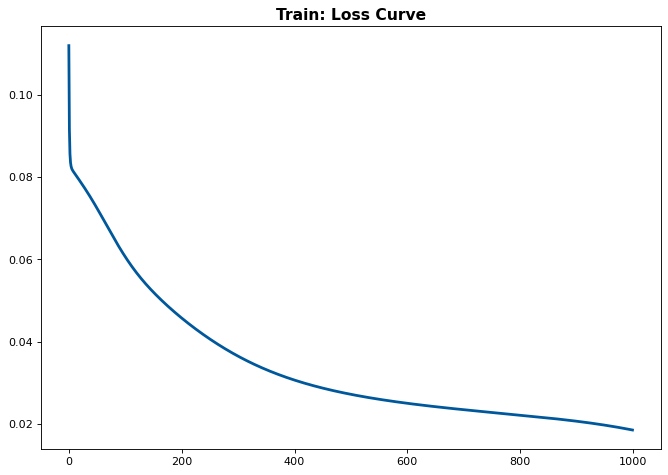

In [ ]:
ann = myANN(layers = [x_ann1.shape[1], 4, 1], lr=0.2, activation='sigmoid')
ann.train(x_ann1, y_ann1, epochs=1000)
train_loss1 = ann.train_loss
plt.figure(figsize=(10, 7), dpi=80)
plt.plot(train_loss1, linewidth = 2.5, color = '#00589c')
plt.title("Train: Loss Curve", fontsize=14, fontweight='bold')
plt.show()

In [ ]:
# 测试集
predicts_ann1 = ann.predict(test_x_ann1)
print("==== 模型输出: predicts_ann1 ====")
print(predicts_ann1)
predicts_ann1_res = np.round(predicts_ann1)
print("==== 最终结果: predicts_ann1_res ====")
print(predicts_ann1_res)
test_y_ann1 = list(test.iloc[:, -1].values.flatten())
# 计算acc
acc = accuracy_score(test_y_ann1, predicts_ann1_res)
print("该ANN模型的准确率为：", acc)

==== 模型输出: predicts_ann1 ====
[0.6075541586676231, 0.9935506678333125, 0.8131859509600735, 0.3497495212964826, 0.4694554382341253, 0.9545725789407199, 0.9963297898554977]
==== 最终结果: predicts_ann1_res ====
[1. 1. 1. 0. 0. 1. 1.]
该ANN模型的准确率为： 0.7142857142857143


In [ ]:
new_data_encoded

,age,income,student,credit_rating
0,0,2,3,1


In [ ]:
# 预测新数据
new_result5 = np.round(ann.predict(new_data_encoded.values))
print()
print("ANN预测该新数据的类别为：", int(new_result5[0]))


ANN预测该新数据的类别为： 1


## Continuous data

In [ ]:
# 使用等宽离散化后的数据
x_ann2 = ctrain.iloc[:, :-1].values
y_ann2 = ctrain.iloc[:, -1].values.reshape(-1, 1)

test_x_ann2 = ctest.iloc[:, :-1].values
test_y_ann2 = list(ctest.iloc[:, -1].values.flatten())

print(x_ann2.shape, y_ann2.shape, test_x_ann2.shape)

(18, 7) (18, 1) (9, 7)


-----Epoch: 0 Loss-----: 0.12834496171219584
-----Epoch: 5 Loss-----: 0.11327341137268195
-----Epoch: 10 Loss-----: 0.1130562654798762
-----Epoch: 15 Loss-----: 0.11294373504932441
-----Epoch: 20 Loss-----: 0.11282471873136173
-----Epoch: 25 Loss-----: 0.11270386910871855
-----Epoch: 30 Loss-----: 0.11258204153807988
-----Epoch: 35 Loss-----: 0.11245912681220534
-----Epoch: 40 Loss-----: 0.11233486875881936
-----Epoch: 45 Loss-----: 0.11220899354332246
-----Epoch: 50 Loss-----: 0.11208122821133092
-----Epoch: 55 Loss-----: 0.1119513025626746
-----Epoch: 60 Loss-----: 0.11181894852158934
-----Epoch: 65 Loss-----: 0.1116838991059737
-----Epoch: 70 Loss-----: 0.11154588730438045
-----Epoch: 75 Loss-----: 0.11140464490619248
-----Epoch: 80 Loss-----: 0.11125990129521826
-----Epoch: 85 Loss-----: 0.11111138221590228
-----Epoch: 90 Loss-----: 0.11095880852557426
-----Epoch: 95 Loss-----: 0.11080189495120531
-----Epoch: 100 Loss-----: 0.11064034887419269
-----Epoch: 105 Loss-----: 0.110473869

-----Epoch: 1275 Loss-----: 0.04251562026115843
-----Epoch: 1280 Loss-----: 0.04235239122026005
-----Epoch: 1285 Loss-----: 0.04218932072686181
-----Epoch: 1290 Loss-----: 0.042026388172055555
-----Epoch: 1295 Loss-----: 0.04186357262266914
-----Epoch: 1300 Loss-----: 0.04170085284402772
-----Epoch: 1305 Loss-----: 0.041538207324547036
-----Epoch: 1310 Loss-----: 0.04137561430212463
-----Epoch: 1315 Loss-----: 0.04121305179227871
-----Epoch: 1320 Loss-----: 0.041050497617964254
-----Epoch: 1325 Loss-----: 0.040887929440977425
-----Epoch: 1330 Loss-----: 0.040725324794835475
-----Epoch: 1335 Loss-----: 0.0405626611189971
-----Epoch: 1340 Loss-----: 0.04039991579426212
-----Epoch: 1345 Loss-----: 0.040237066179164165
-----Epoch: 1350 Loss-----: 0.04007408964714167
-----Epoch: 1355 Loss-----: 0.03991096362424688
-----Epoch: 1360 Loss-----: 0.03974766562712319
-----Epoch: 1365 Loss-----: 0.039584173300954636
-----Epoch: 1370 Loss-----: 0.03942046445706651
-----Epoch: 1375 Loss-----: 0.0392

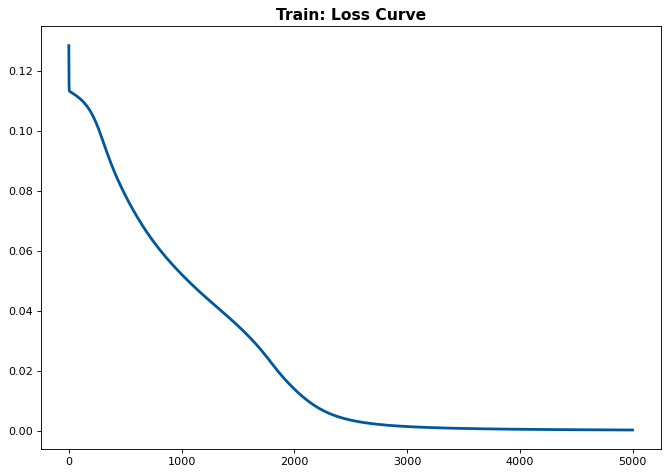

In [ ]:
ann2 = myANN(layers = [x_ann2.shape[1], 16, 8, 1], lr=0.1, activation='sigmoid')
ann2.train(x_ann2, y_ann2, epochs=5000)
train_loss2 = ann2.train_loss
plt.figure(figsize=(10, 7), dpi=80)
plt.plot(train_loss2, linewidth = 2.5, color = '#00589c')
plt.title("Train: Loss Curve", fontsize=14, fontweight='bold')
plt.show()

In [ ]:
# 测试集
predicts_ann2 = ann2.predict(test_x_ann2)
print("==== 模型输出: predicts_ann2 ====")
print(predicts_ann2)
predicts_ann2_res = np.round(predicts_ann2)
print("==== 最终结果: predicts_ann2_res ====")
print(predicts_ann2_res)
# 计算acc
acc = accuracy_score(test_y_ann2, predicts_ann2_res)
print("该ANN模型的准确率为：", acc)

==== 模型输出: predicts_ann2 ====
[0.8504048307877611, 0.09503547684320526, 0.9221999835853834, 0.9727177547384379, 3.585362621166641e-05, 6.66520465755708e-05, 0.9903706585217796, 0.8958005165734588, 0.9835363543712075]
==== 最终结果: predicts_ann2_res ====
[1. 0. 1. 1. 0. 0. 1. 1. 1.]
该ANN模型的准确率为： 0.6666666666666666


In [ ]:
# 预测新数据
new_result6 = np.round(ann2.predict(new_cdata.values.reshape(1, -1).astype(float)))
print()
print("ANN预测该新数据的类别为：", int(new_result6[0]))


ANN预测该新数据的类别为： 0


# Task C(ANN Python编程 金融时序数据)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
finData = pd.read_csv('../Data/附件3-金融时序数据.csv', encoding='gbk').set_index('交易日期')
finData = finData[["开盘价", "最高价", "最低价", "收盘价","成交量"]]
finData["t+1收盘价"] = finData["收盘价"].shift(-1)
finData.dropna(how="any", axis=0, inplace=True)
finData.index = pd.DatetimeIndex(finData.index)
finData

,开盘价,最高价,最低价,收盘价,成交量,t+1收盘价
交易日期,,,,,,
1991-01-03,66.40,66.40,66.40,66.40,21200,66.07
1991-01-04,66.07,66.07,66.07,66.07,16800,66.42
1991-01-07,66.42,66.42,66.42,66.42,40200,65.76
1991-01-09,65.76,65.76,65.76,65.76,6100,65.43
1991-01-10,65.43,65.43,65.43,65.43,4900,65.10
...,...,...,...,...,...,...
2023-04-19,13.02,13.07,12.83,12.85,101437815,12.75
2023-04-20,12.90,12.90,12.62,12.75,81178841,12.50
2023-04-21,12.70,12.83,12.48,12.50,91866839,12.10


In [ ]:
# 标准化
scaler1 = MinMaxScaler()
finData_scaled = scaler1.fit_transform(finData.values)
# 存储每个特征的最值，用于inverse
mins1 = finData.min()
maxs1 = finData.max()
y_min1 = mins1['t+1收盘价']
y_max1 = maxs1['t+1收盘价']

In [ ]:
finData_train, finData_test = holdout(finData_scaled ,test_size=0.2)

finData_train_x = finData_train[:, :-1]
finData_train_y = finData_train[:, -1].reshape(-1, 1)
finData_test_x = finData_test[:, :-1]
finData_test_y = finData_test[:, -1].reshape(-1, 1)

print(finData_train_x.shape, finData_train_y.shape, finData_test_x.shape, finData_test_y.shape)

(6128, 5) (6128, 1) (1533, 5) (1533, 1)


-----Epoch: 0 Loss-----: 0.011950403572972699
-----Epoch: 5 Loss-----: 0.0004357905990360569
-----Epoch: 10 Loss-----: 0.00040609719162735137
-----Epoch: 15 Loss-----: 0.0003859599748221514


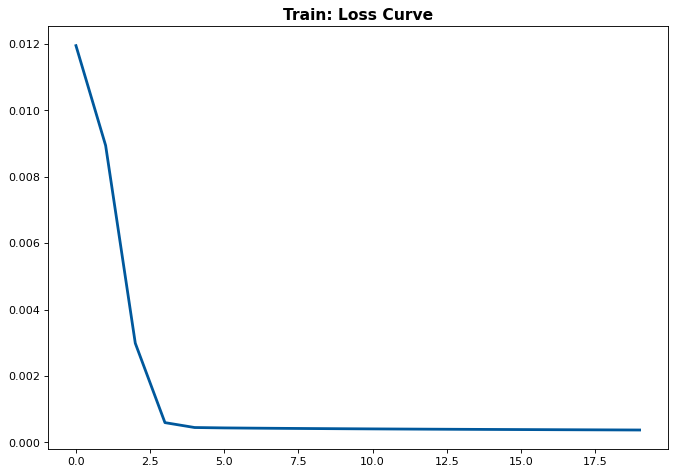

In [ ]:
ann3 = myANN(layers = [finData_train_x.shape[1],8, 4, 1], lr = 0.1, activation="sigmoid")
ann3.train(finData_train_x, finData_train_y, epochs=20)
train_loss3 = ann3.train_loss
plt.figure(figsize=(10, 7), dpi=80)
plt.plot(train_loss3, linewidth = 2.5, color = '#00589c')
plt.title("Train: Loss Curve", fontsize=14, fontweight='bold')
plt.show()

In [ ]:
# 测试集
predicts_ann3 = ann3.predict(finData_test_x)

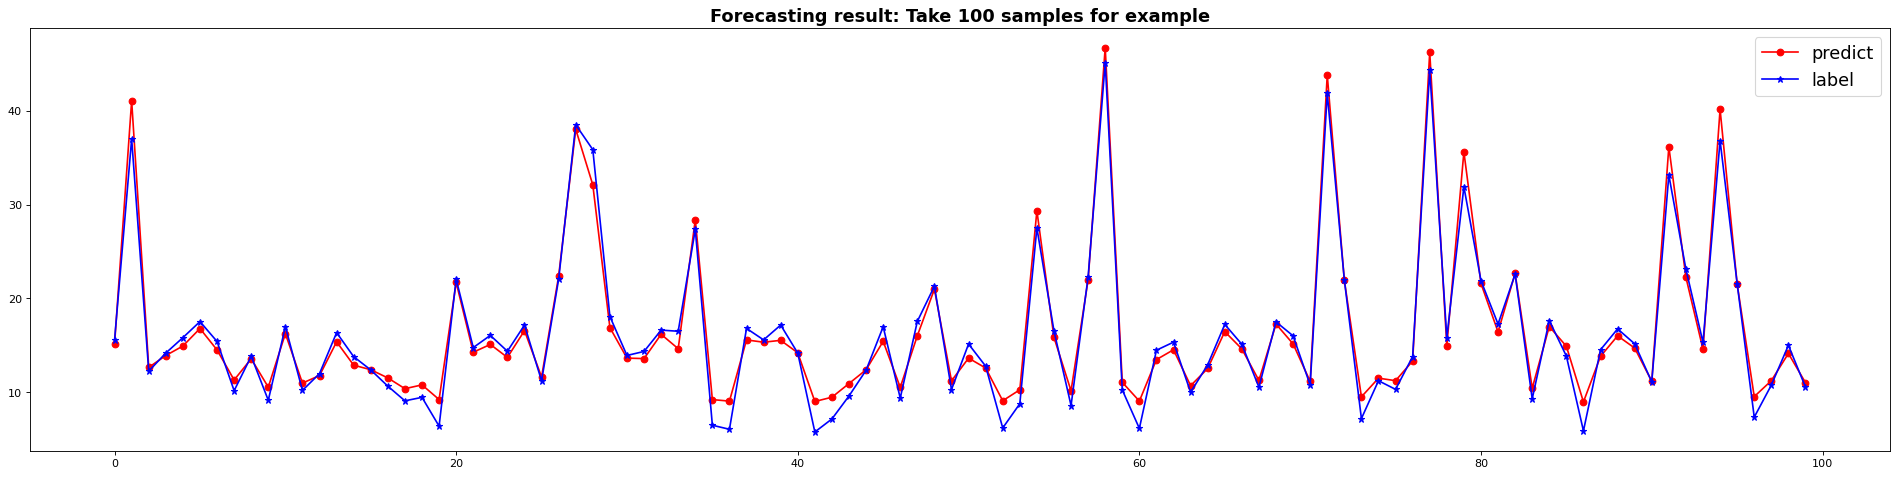

In [ ]:
# 反归一化
predictions3 = np.array(predicts_ann3)*(y_max1-y_min1)+y_min1
labels3 = finData_test_y.reshape(-1, 1)
labels3 = np.array(labels3)*(y_max1-y_min1)+y_min1
plt.figure(figsize=(30, 7), dpi=80)
plt.plot(predictions3[200:300], label="predict", color="red", marker="o")
plt.plot(labels3[200:300], label="label", color="blue", marker="*")
plt.legend(fontsize=16,)
plt.title("Forecasting result: Take 100 samples for example", fontsize=16, fontweight='bold')
plt.show()

In [ ]:
# 评价指标
print("------- 评价指标 -------")
print("MAE:",mean_absolute_error(labels3, predictions3))
print("MSE:",mean_squared_error(labels3, predictions3))
print("RMSE:",np.sqrt(mean_squared_error(labels3, predictions3)))
print("R2:",r2_score(labels3, predictions3))

------- 评价指标 -------
MAE: 1.1416483470134164
MSE: 2.8291797833989607
RMSE: 1.682016582379306
R2: 0.9694199473183973
